In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

C:\Users\Priyanka\AppData\Local\Temp\ipykernel_4436\2892209473.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Load Data

In [2]:
df = pd.read_csv('AmazonSales.csv', encoding= 'unicode_escape')

In [3]:
df.shape

(100, 14)

In [4]:
df.head(10)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
5,Australia and Oceania,Solomon Islands,Baby Food,Online,C,2/4/2015,547995746,2/21/2015,2974,255.28,159.42,759202.72,474115.08,285087.64
6,Sub-Saharan Africa,Angola,Household,Offline,M,4/23/2011,135425221,4/27/2011,4187,668.27,502.54,2798046.49,2104134.98,693911.51
7,Sub-Saharan Africa,Burkina Faso,Vegetables,Online,H,7/17/2012,871543967,7/27/2012,8082,154.06,90.93,1245112.92,734896.26,510216.66
8,Sub-Saharan Africa,Republic of the Congo,Personal Care,Offline,M,7/14/2015,770463311,8/25/2015,6070,81.73,56.67,496101.10,343986.90,152114.20
9,Sub-Saharan Africa,Senegal,Cereal,Online,H,4/18/2014,616607081,5/30/2014,6593,205.70,117.11,1356180.10,772106.23,584073.87


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [6]:
pd.isnull(df).sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [7]:
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [8]:
df.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [9]:
df[['Order ID', 'Unit Price', 'Total Profit']].describe()

,Order ID,Unit Price,Total Profit
count,1.000000e+02,100.000000,1.000000e+02
mean,5.550204e+08,276.761300,4.416820e+05
std,2.606153e+08,235.592241,4.385379e+05
min,1.146066e+08,9.330000,1.258020e+03
25%,3.389225e+08,81.730000,1.214436e+05
50%,5.577086e+08,179.880000,2.907680e+05
75%,7.907551e+08,437.200000,6.358288e+05
max,9.940222e+08,668.270000,1.719922e+06


In [10]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [11]:
df.head(10)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
5,Australia and Oceania,Solomon Islands,Baby Food,Online,C,2015-02-04,547995746,2/21/2015,2974,255.28,159.42,759202.72,474115.08,285087.64
6,Sub-Saharan Africa,Angola,Household,Offline,M,2011-04-23,135425221,4/27/2011,4187,668.27,502.54,2798046.49,2104134.98,693911.51
7,Sub-Saharan Africa,Burkina Faso,Vegetables,Online,H,2012-07-17,871543967,7/27/2012,8082,154.06,90.93,1245112.92,734896.26,510216.66
8,Sub-Saharan Africa,Republic of the Congo,Personal Care,Offline,M,2015-07-14,770463311,8/25/2015,6070,81.73,56.67,496101.10,343986.90,152114.20
9,Sub-Saharan Africa,Senegal,Cereal,Online,H,2014-04-18,616607081,5/30/2014,6593,205.70,117.11,1356180.10,772106.23,584073.87


In [12]:
df['year'] = df['Order Date'].dt.year

In [13]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,year
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,2012
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82,2014
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013


In [14]:
df['Month'] = df['Order Date'].dt.month

In [15]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,year,Month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2


In [16]:
df.drop(columns=['mmonth', 'month'], inplace=True)

KeyError: "['mmonth', 'month'] not found in axis"

In [ ]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,year,Month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2


In [ ]:
df.rename(columns={'year': 'Year'}, inplace=True)

In [ ]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year,Month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2


In [ ]:
df.groupby(['Year', 'Month'])['Units Sold'].sum().reset_index()

,Year,Month,Units Sold
0,2010,2,9503
1,2010,5,15747
2,2010,6,9905
3,2010,10,14403
4,2010,11,7910
5,2010,12,4103
6,2011,1,12914
7,2011,2,8156
8,2011,4,4187
9,2011,5,5741


In [ ]:
monthly_Sales = df.groupby(['Year', 'Month'])['Units Sold'].sum().reset_index()

In [ ]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year,Month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2


In [ ]:
monthly_Sales.head()


,Year,Month,Units Sold
0,2010,2,9503
1,2010,5,15747
2,2010,6,9905
3,2010,10,14403
4,2010,11,7910


In [ ]:

average_monthly_Sales = monthly_Sales.groupby('Month')['Units Sold'].mean()

In [ ]:
average_monthly_Sales.head()

Month
1     8935.500000
2    10154.142857
3     3624.250000
4     8936.000000
5    10608.500000
Name: Units Sold, dtype: float64

In [ ]:
yearly_sales = df.groupby('Year')['Units Sold'].sum()

In [ ]:
yearly_sales.head()

Year
2010    61571
2011    54768
2012    97967
2013    64663
2014    92040
Name: Units Sold, dtype: int64

In [ ]:
sales_growth_rate = yearly_sales.pct_change()

In [ ]:
sales_growth_rate.head()

Year
2010         NaN
2011   -0.110490
2012    0.788764
2013   -0.339951
2014    0.423380
Name: Units Sold, dtype: float64

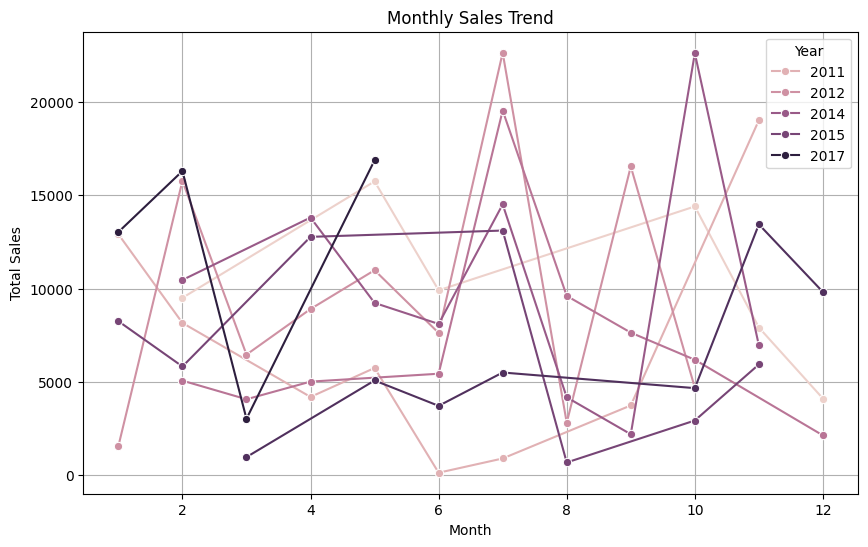

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_Sales, x='Month', y='Units Sold', hue='Year', marker='o') 
plt.title('Monthly Sales Trend')
plt.xlabel('Month')             
plt.ylabel('Total Sales')
plt.legend(title='Year')
plt.grid(True)
plt.show()          

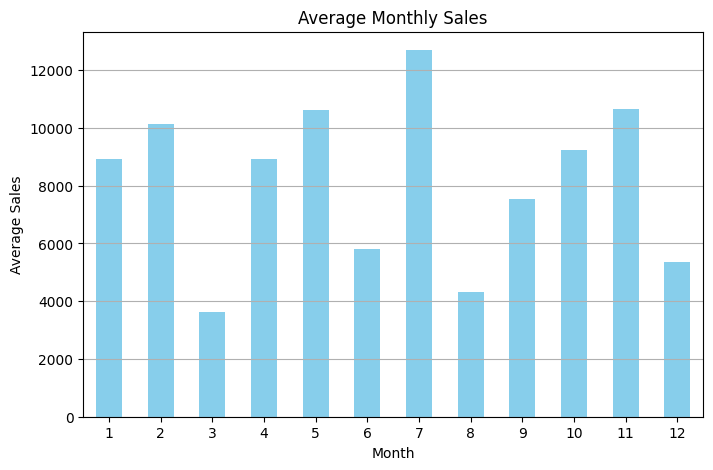

In [ ]:
plt.figure(figsize=(8,5))
average_monthly_Sales.plot(kind='bar', color='skyblue')
plt.title('Average Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

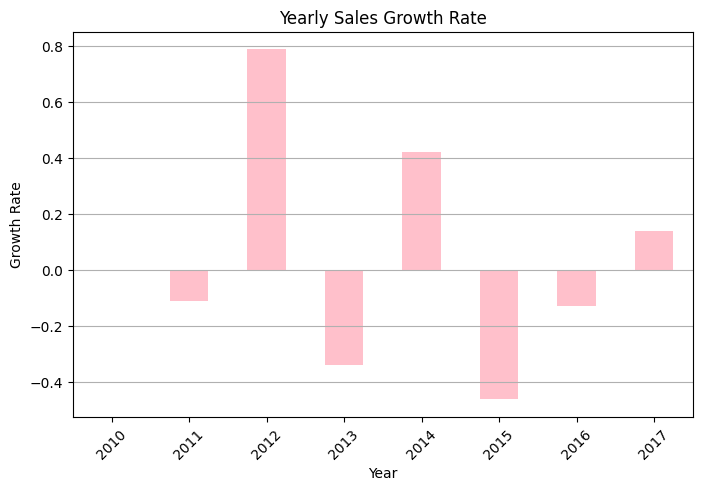

In [ ]:
plt.figure(figsize=(8,5))
sales_growth_rate.plot(kind='bar', color='pink')
plt.title('Yearly Sales Growth Rate')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [ ]:
Units_sold_by_region = df.groupby('Region')['Units Sold'].sum()

In [ ]:
Units_sold_by_region.head()

Region
Asia                                 59967
Australia and Oceania                68325
Central America and the Caribbean    35771
Europe                               98117
Middle East and North Africa         48678
Name: Units Sold, dtype: int64

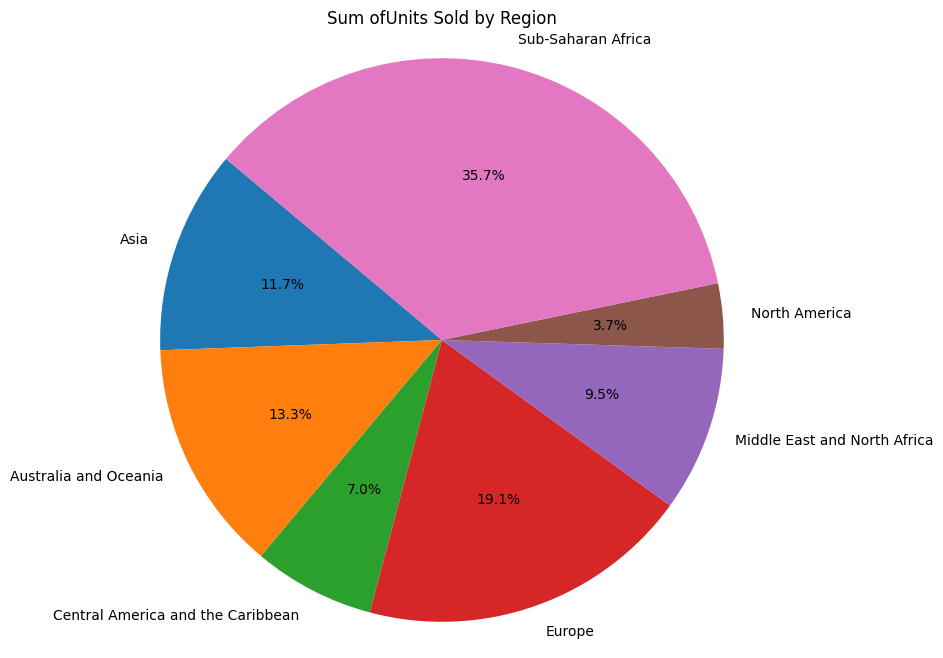

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(Units_sold_by_region, labels=Units_sold_by_region.index, autopct='%1.1f%%', startangle=140)
plt.title('Sum ofUnits Sold by Region')
plt.axis('equal')
plt.show()

In [ ]:
units_sold_by_sales_channel = df.groupby('Sales Channel')['Units Sold'].sum()

In [ ]:
units_sold_by_sales_channel.head()

Sales Channel
Offline    276782
Online     236089
Name: Units Sold, dtype: int64

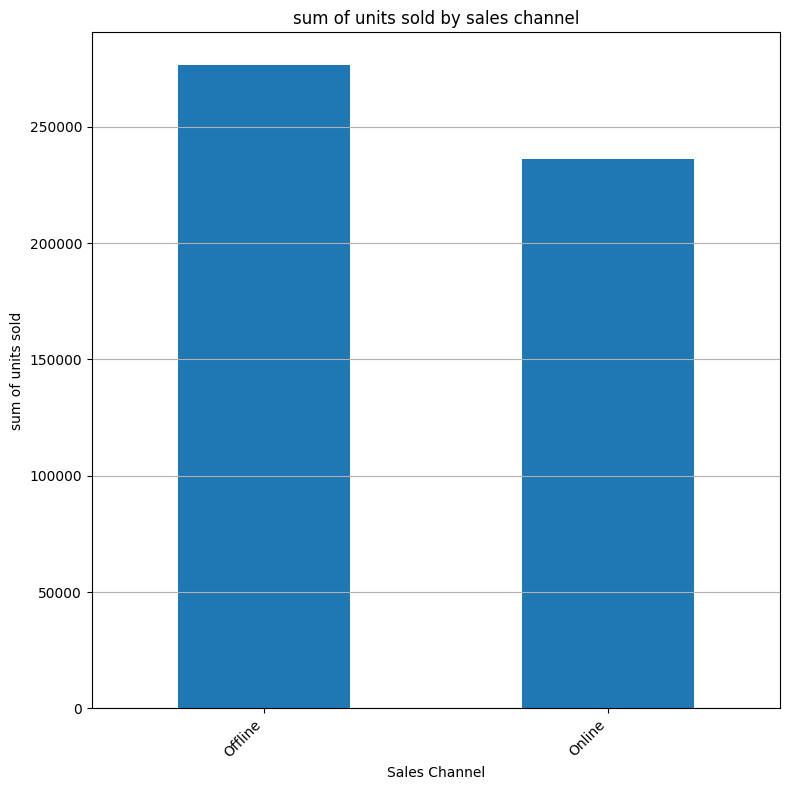

In [ ]:
plt.figure(figsize=(8,8))
units_sold_by_sales_channel.plot(kind='bar')
plt.title('sum of units sold by sales channel')
plt.xlabel('Sales Channel')
plt.ylabel('sum of units sold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
total_sales_by_item_type = df.groupby('Item Type')['Units Sold'].sum()

In [ ]:
total_sales_by_item_type.head()

Item Type
Baby Food    40545
Beverages    56708
Cereal       25877
Clothes      71260
Cosmetics    83718
Name: Units Sold, dtype: int64

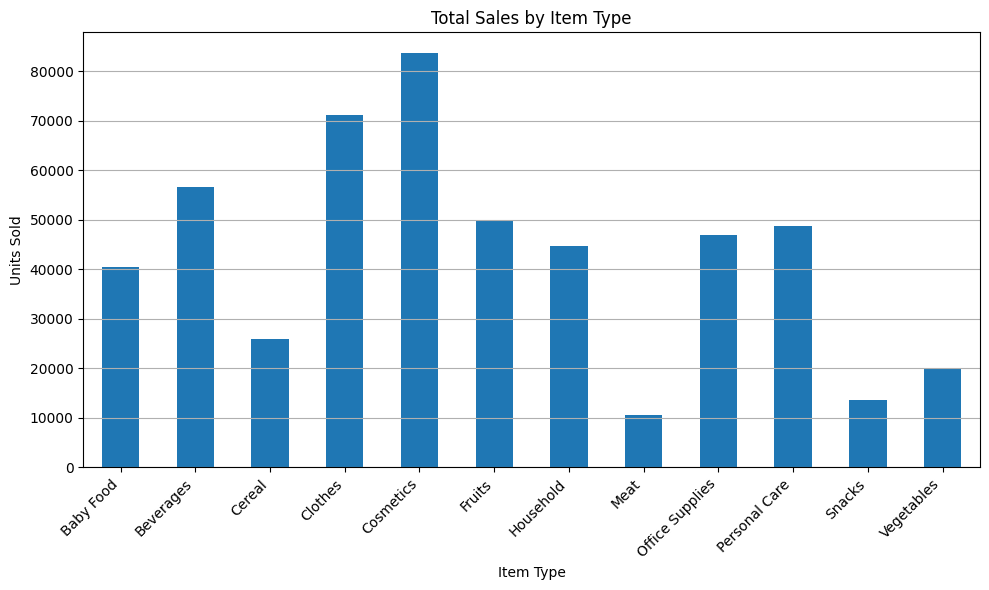

In [ ]:
plt.figure(figsize=(10,6))
total_sales_by_item_type.plot(kind='bar')
plt.title('Total Sales by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Units Sold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [ ]:
df.head()


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50
